# Project Overview and Hypothesis:
### Consumer Financial Protection Bureau of United States of America(CFPB):
The Consumer Financial Protection Bureau was established in USA for enabling the USA consumers to report customer support and complaint related information regarding their financial issues with the US government. The complaint data is freely available for analysis and tracking of how efficiently and effectively the financial institutes handle the complaints lodged against them. Each complaint consists of attributes that can uniquely describe and identify it.
The Consumer Financial Protection Bureau information can be used in prescriptive analysis to enhance financial consumer services and also improve the response quality of automated consumer support systems.

### Hypothesis:
A closer look and analysis at these observations can help financial institutions understand their own internal complaint issues and databases as they relate to data from Consumer Complaint Database, and use the resulting insights to potentially improve their regulatory compliance efforts, customer experience, and their own operational effectiveness.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1) Data gathering and cleanup: 
### Load the CFPB data and analyze 

In [2]:
complains_data = pd.read_csv('Consumer_Complaints.csv')
complains_data.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100


### Features/Column Information: 

In [3]:
complains_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943473 entries, 0 to 943472
Data columns (total 18 columns):
Date received                   943473 non-null object
Product                         943473 non-null object
Sub-product                     708303 non-null object
Issue                           943473 non-null object
Sub-issue                       459401 non-null object
Consumer complaint narrative    235060 non-null object
Company public response         277088 non-null object
Company                         943473 non-null object
State                           932938 non-null object
ZIP code                        928889 non-null object
Tags                            131267 non-null object
Consumer consent provided?      422854 non-null object
Submitted via                   943473 non-null object
Date sent to company            943473 non-null object
Company response to consumer    943473 non-null object
Timely response?                943473 non-null object
Consumer 

### Pandas Profilling: Gives high level overview of the dataset
pip install pandas_profiling

In [181]:
import pandas_profiling
pandas_profiling.ProfileReport(complains_data) 

Number of variables,18
Number of observations,943473
Total Missing (%),21.4%
Total size in memory,129.6 MiB
Average record size in memory,144.0 B
Numeric,1
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Pivot ui 
pip install pivottablejs

In [182]:
from pivottablejs import pivot_ui
pivot_ui(complains_data)

### Raw Column names:

In [4]:
complains_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

### Cleaning the column names:

In [5]:
# Replacing space with '-' in the column names and '?' with none
complains_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True )
complains_data.rename(columns=lambda x: x.replace('?', ''), inplace=True )
complains_data.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID'],
      dtype='object')

### Total records and columns in CFPB database

In [6]:
complains_data.shape

(943473, 18)

### Selecting one financial institution(i.e BOW) data from the entrie dataset

In [7]:
# Storing only BOW complains
BOW_complains =complains_data[complains_data.Company == 'BANK OF THE WEST']
BOW_complains.head(3)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
2644,09/13/2014,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,NaN,NaN,Web,09/18/2014,Closed with explanation,Yes,Yes,1027710
3390,05/08/2013,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,BANK OF THE WEST,CA,94563,Older American,NaN,Web,05/08/2013,Closed with explanation,Yes,Yes,400780
3673,12/07/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,Company has responded to the consumer and the ...,BANK OF THE WEST,CO,80012,NaN,NaN,Referral,12/07/2016,Closed with explanation,Yes,Yes,2238408


### Only BOW complaints in CFPB database

In [8]:
BOW_complains.shape

(894, 18)

## 2) Data inspection / Visualization:

### Distribution of complaints acrross products

In [9]:
BOW_complains.Product.count()

894

In [10]:
BOW_complains.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID'],
      dtype='object')

In [11]:
BOW_complains.Product.value_counts()

Bank account or service                                                         458
Mortgage                                                                        132
Consumer Loan                                                                   107
Checking or savings account                                                      76
Credit card                                                                      47
Debt collection                                                                  21
Vehicle loan or lease                                                            18
Credit reporting, credit repair services, or other personal consumer reports     10
Money transfers                                                                   7
Credit card or prepaid card                                                       7
Payday loan, title loan, or personal loan                                         5
Money transfer, virtual currency, or money service                          

### Unique Products

In [12]:
BOW_complains.Product.describe()

count                         894
unique                         15
top       Bank account or service
freq                          458
Name: Product, dtype: object

### Checking for any null products

In [13]:
BOW_complains.Product.isnull().sum()

0

### Complaints by State

In [14]:
BOW_complains.State.value_counts().head()

CA    380
CO     99
NE     50
AZ     34
NM     29
Name: State, dtype: int64

### Unique complaints by State

In [15]:
BOW_complains.State.describe()

count     876
unique     45
top        CA
freq      380
Name: State, dtype: object

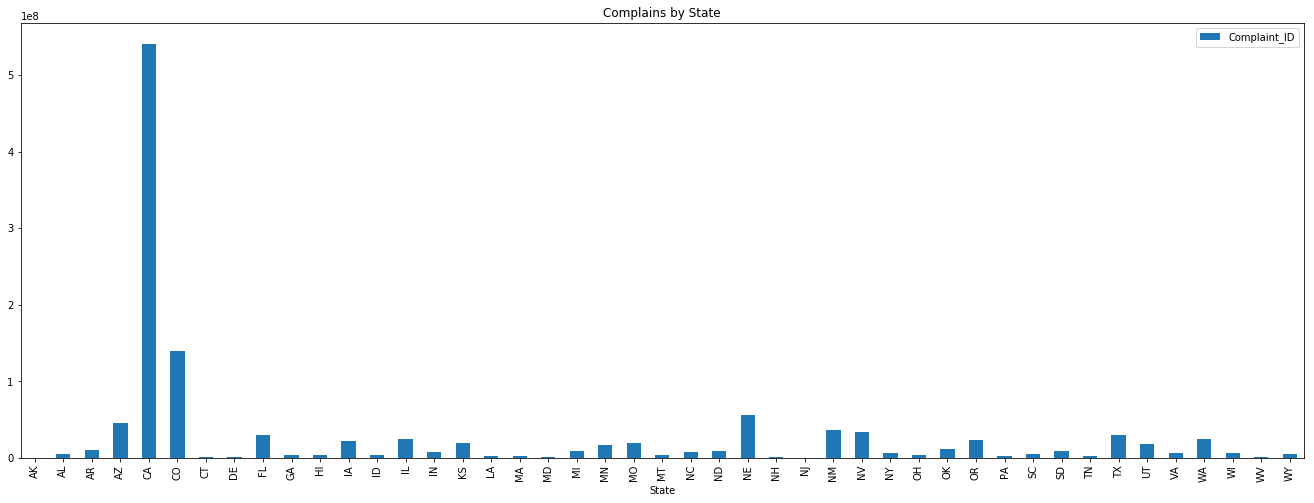

In [16]:
BOW_complains.groupby('State').aggregate(np.sum).plot(title ='Complains by State',kind = 'bar',figsize = (23,8));

In [17]:
#Population?

### Visualize distribution of complaints acrross products

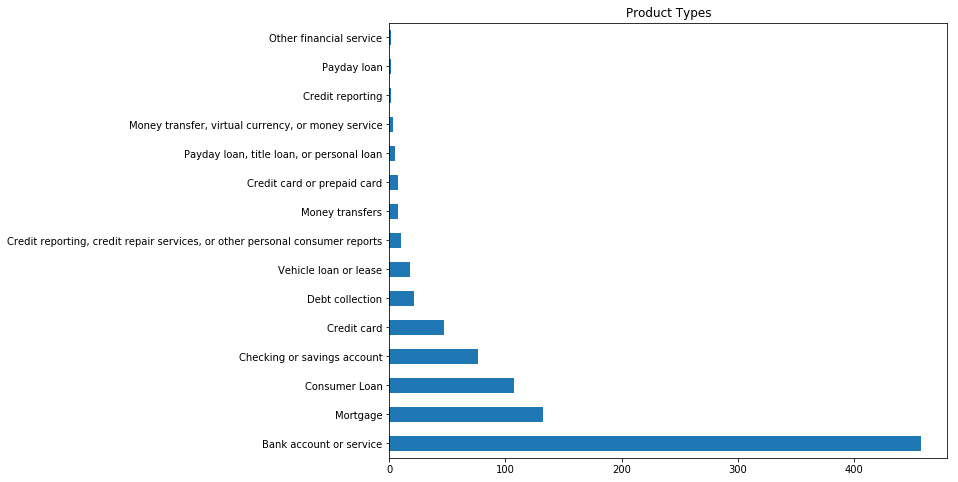

In [18]:
BOW_complains.Product.value_counts().plot(title='Product Types', kind='barh',figsize = (10,8));


### Company(BOW) response to consumer:

In [19]:
BOW_complains['Company_response_to_consumer'].value_counts()

Closed with explanation            663
Closed with monetary relief        149
Closed with non-monetary relief     40
Closed without relief               22
Closed with relief                  10
In progress                          6
Closed                               3
Untimely response                    1
Name: Company_response_to_consumer, dtype: int64

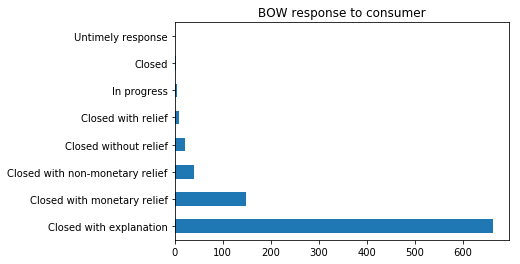

In [20]:
BOW_complains['Company_response_to_consumer'].value_counts().plot(title='BOW response to consumer',kind ='barh');

### Complains by Year:

In [21]:
BOW_complains['Date_received'].head()

2644    09/13/2014
3390    05/08/2013
3673    12/07/2016
4428    05/04/2017
4671    01/21/2015
Name: Date_received, dtype: object

In [22]:
BOW_complains['Date_received'].describe()

count            894
unique           683
top       12/27/2017
freq               4
Name: Date_received, dtype: object

### Mode of Complaints Submission

In [23]:
BOW_complains['Submitted_via'].value_counts()

Web            435
Referral       323
Phone           71
Postal mail     51
Fax             13
Email            1
Name: Submitted_via, dtype: int64

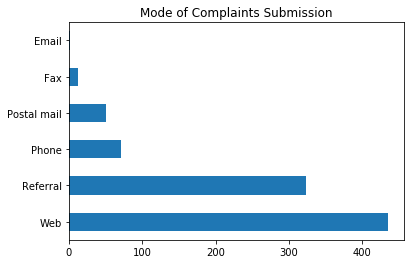

In [24]:
BOW_complains['Submitted_via'].value_counts().plot(title ='Mode of Complaints Submission', kind ='barh');

### Products within BOW having best customer servie:

In [25]:
BOW_consumer_complaint_best_service =  BOW_complains[(BOW_complains.Timely_response == 'Yes') &
                                                 (BOW_complains.Consumer_disputed == 'No')]
BOW_consumer_complaint_best_service.head(2)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
4671,01/21/2015,Bank account or service,Checking account,Problems caused by my funds being low,NaN,NaN,NaN,BANK OF THE WEST,NE,68164,Older American,NaN,Web,01/21/2015,Closed with monetary relief,Yes,No,1202306
4778,06/04/2015,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,I live in XXXX and I purchased a car in XXXX X...,Company chooses not to provide a public response,BANK OF THE WEST,CO,805XX,NaN,Consent provided,Web,06/04/2015,Closed with explanation,Yes,No,1405349


In [26]:
BOW_consumer_complaint_best_service.Product.value_counts()

Bank account or service    354
Mortgage                    85
Consumer Loan               78
Credit card                 35
Debt collection             14
Money transfers              6
Credit reporting             1
Other financial service      1
Payday loan                  1
Name: Product, dtype: int64

### Converting datatype of Date_received from object to datetime

In [27]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
BOW_complains['Date_received'] = pd.to_datetime(BOW_complains.Date_received)

In [29]:
BOW_complains.dtypes

Date_received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer_complaint_narrative            object
Company_public_response                 object
Company                                 object
State                                   object
ZIP_code                                object
Tags                                    object
Consumer_consent_provided               object
Submitted_via                           object
Date_sent_to_company                    object
Company_response_to_consumer            object
Timely_response                         object
Consumer_disputed                       object
Complaint_ID                             int64
dtype: object

In [30]:
BOW_complains.Date_received.dt.year.head()

2644    2014
3390    2013
3673    2016
4428    2017
4671    2015
Name: Date_received, dtype: int64

In [31]:
BOW_complains.Date_received.dt.month.head()

2644     9
3390     5
3673    12
4428     5
4671     1
Name: Date_received, dtype: int64

In [32]:
BOW_complains.Date_received.dt.weekday_name.head()

2644     Saturday
3390    Wednesday
3673    Wednesday
4428     Thursday
4671    Wednesday
Name: Date_received, dtype: object

In [33]:
BOW_complains.Date_received.dt.weekday_name.value_counts().sort_index()

Friday       164
Monday       150
Saturday      36
Sunday        38
Thursday     162
Tuesday      155
Wednesday    189
Name: Date_received, dtype: int64

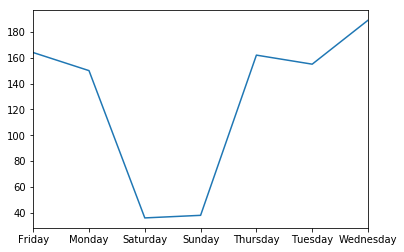

In [34]:
BOW_complains.Date_received.dt.weekday_name.value_counts().sort_index().plot();

### Complaints raised by Year:

In [35]:
BOW_complains['Year'] = BOW_complains.Date_received.dt.year

In [36]:
BOW_complains.Year.value_counts().sort_index()

2011      1
2012    111
2013    115
2014    156
2015    151
2016    165
2017    195
Name: Year, dtype: int64

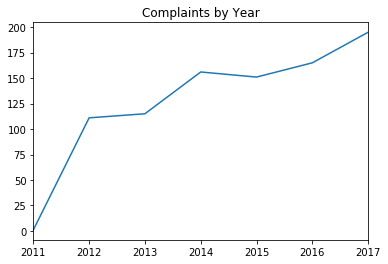

In [37]:
BOW_complains.Year.value_counts().sort_index().plot(title='Complaints by Year');

### Complainst per Month i.e in 2017

In [38]:
Complaints_2017 = BOW_complains[BOW_complains.Year == 2017]
Complaints_2017.Date_received.dt.month.value_counts().sort_index()

1     22
2     12
3     17
4     17
5     13
6     15
7     13
8     18
9      7
10    21
11    19
12    21
Name: Date_received, dtype: int64

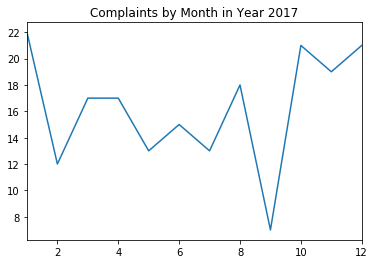

In [39]:
Complaints_2017.Date_received.dt.month.value_counts().sort_index().plot(title='Complaints by Month in Year 2017');

In [40]:
BOW_complains.Product.value_counts()

Bank account or service                                                         458
Mortgage                                                                        132
Consumer Loan                                                                   107
Checking or savings account                                                      76
Credit card                                                                      47
Debt collection                                                                  21
Vehicle loan or lease                                                            18
Credit reporting, credit repair services, or other personal consumer reports     10
Money transfers                                                                   7
Credit card or prepaid card                                                       7
Payday loan, title loan, or personal loan                                         5
Money transfer, virtual currency, or money service                          

In [41]:
BOW_complains.State.value_counts()

CA    380
CO     99
NE     50
AZ     34
NM     29
OR     22
NV     21
TX     20
MO     18
FL     17
IA     17
KS     16
WA     15
IL     13
MN     12
UT     11
OK     10
SD      7
MI      7
NY      6
VA      6
ND      6
AR      5
WY      5
NC      5
WI      4
OH      4
SC      3
ID      3
AL      3
IN      3
GA      3
MA      3
MT      2
PA      2
MD      2
DE      2
TN      2
NH      2
HI      2
WV      1
LA      1
NJ      1
CT      1
AK      1
Name: State, dtype: int64

### Visualize distribution of complaints acrross differnt states with Product

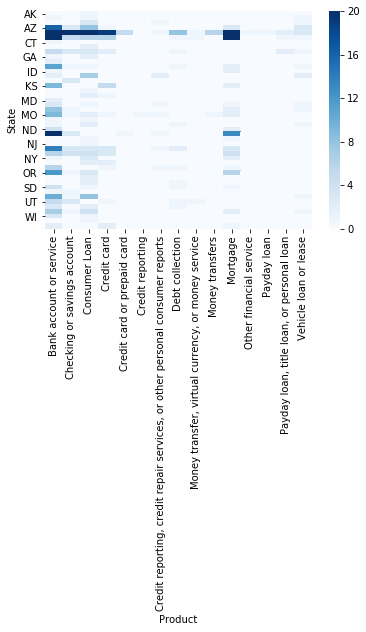

In [42]:
sns.heatmap(BOW_complains.groupby(['State','Product']).size().unstack().fillna(0).clip(lower =0,upper =20), cmap= 'Blues')

### Visualize distribution of complaints acrross differnt states with Product(Compare CA % with other states)

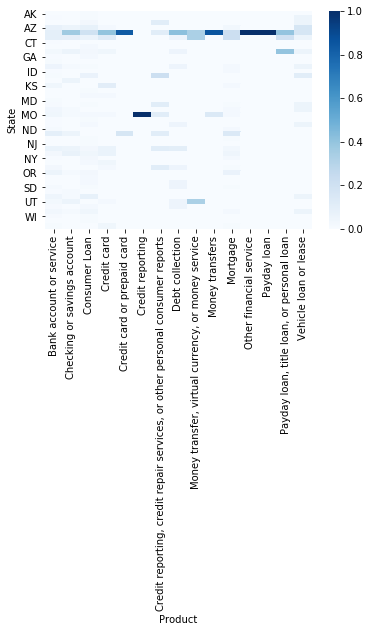

In [43]:
plot_map =BOW_complains.groupby(['State','Product']).size().unstack().fillna(0).clip(lower =0,upper =20)
sns.heatmap(plot_map.div(plot_map.sum()), cmap= 'Blues')


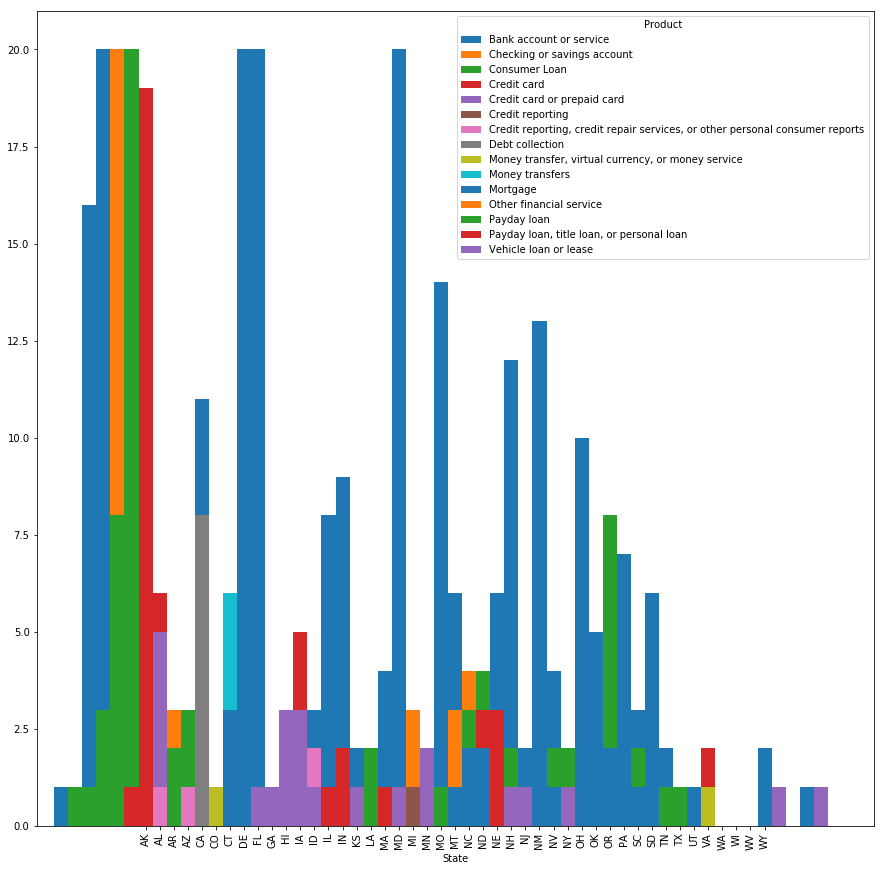

In [44]:
BOW_complains.groupby(['State','Product']).size().unstack().fillna(0).clip(lower =0,upper =20).plot(kind ='bar',width = 15,figsize = (15,15));

### Pivot table to display Timely response to Consumer

In [45]:
BOW_complains.pivot_table(index='Product',
                          columns ='Company_response_to_consumer' ,
                          aggfunc= len ,
                          values = 'Timely_response' )

Company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,In progress,Untimely response
Product,,,,,,,,
Bank account or service,2.0,307.0,104.0,24.0,6.0,15.0,NaN,NaN
Checking or savings account,NaN,48.0,22.0,NaN,NaN,NaN,6.0,NaN
Consumer Loan,NaN,90.0,8.0,3.0,1.0,5.0,NaN,NaN
Credit card,NaN,33.0,6.0,4.0,1.0,2.0,NaN,1.0
Credit card or prepaid card,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
Credit reporting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Credit reporting, credit repair services, or other personal consumer reports",NaN,9.0,NaN,1.0,NaN,NaN,NaN,NaN
Debt collection,NaN,18.0,NaN,3.0,NaN,NaN,NaN,NaN
"Money transfer, virtual currency, or money service",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


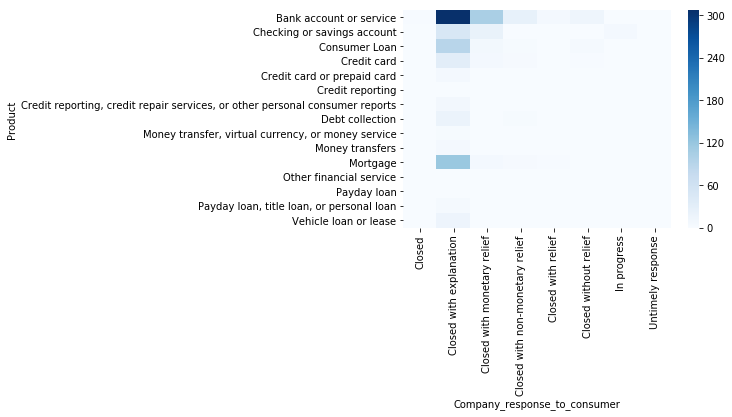

In [46]:
sns.heatmap(BOW_complains.pivot_table(index='Product',
                          columns ='Company_response_to_consumer' ,
                          aggfunc= len ,
                          values = 'Timely_response' ).fillna(0), cmap= 'Blues')

## Comparing with other companies
### Complaints by Company - Top 10:

In [49]:
complains_data.Company.value_counts()[:10]

EQUIFAX, INC.                             74835
BANK OF AMERICA, NATIONAL ASSOCIATION     71864
Experian Information Solutions Inc.       63400
WELLS FARGO & COMPANY                     59659
TRANSUNION INTERMEDIATE HOLDINGS, INC.    57403
JPMORGAN CHASE & CO.                      48638
CITIBANK, N.A.                            39561
OCWEN LOAN SERVICING LLC                  25790
CAPITAL ONE FINANCIAL CORPORATION         24670
Navient Solutions, LLC.                   22675
Name: Company, dtype: int64

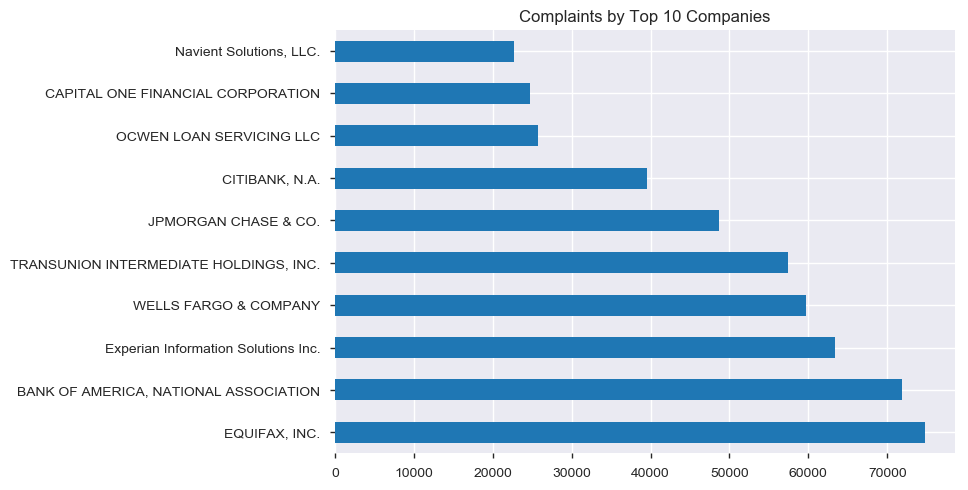

In [50]:
complains_data.Company.value_counts()[:10].plot(title='Complaints by Top 10 Companies', kind='barh');

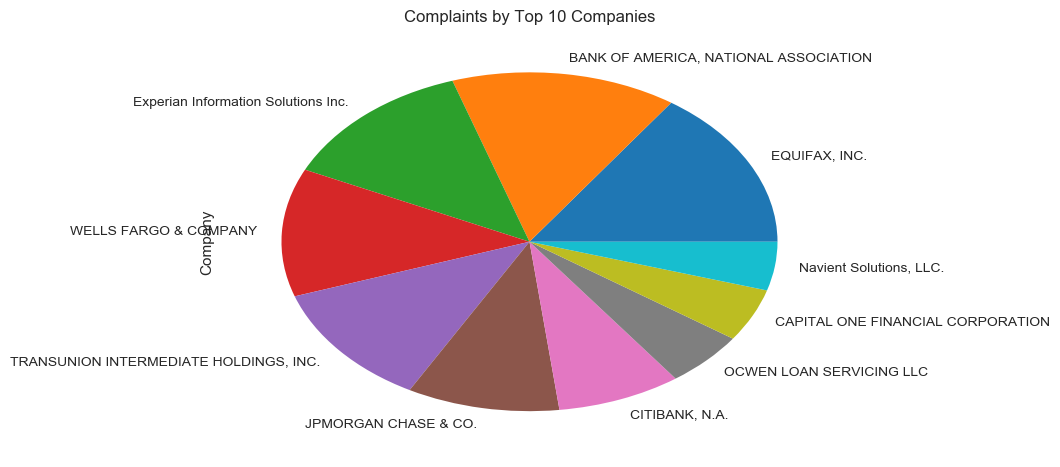

In [51]:
complains_data.Company.value_counts()[:10].plot(title='Complaints by Top 10 Companies', kind='pie');

### Complaints by Product - Top 8:

In [52]:
complains_data.Product.value_counts()[:8]

Mortgage                                                                        246446
Debt collection                                                                 179494
Credit reporting                                                                140433
Credit card                                                                      89191
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     75398
Student loan                                                                     40052
Consumer Loan                                                                    31604
Name: Product, dtype: int64

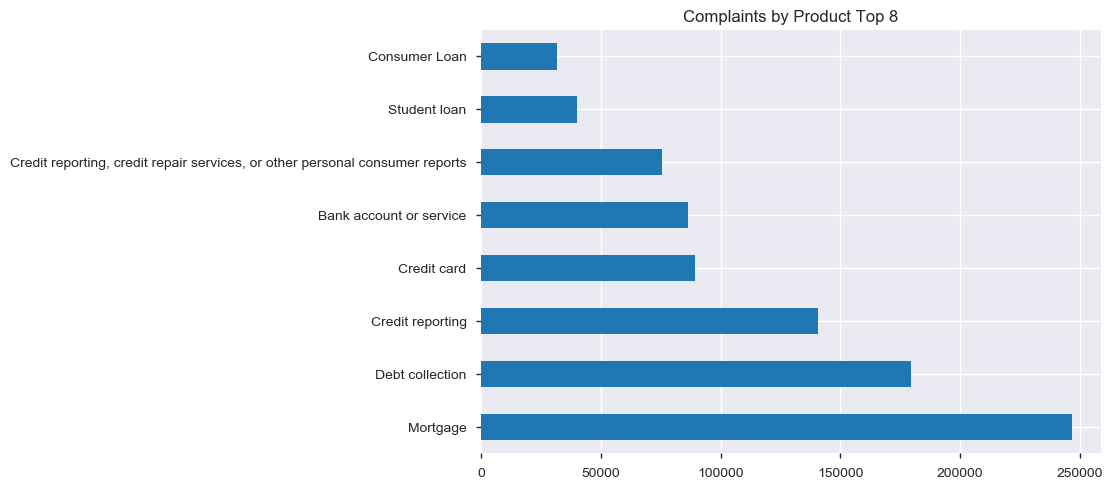

In [53]:
complains_data.Product.value_counts()[:8].plot(title='Complaints by Product Top 8', kind='barh');

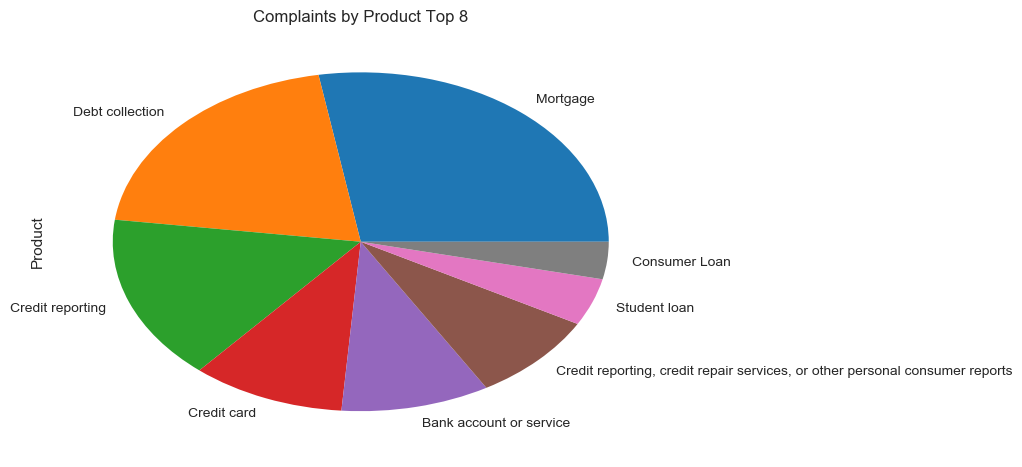

In [54]:
complains_data.Product.value_counts()[:8].plot(title='Complaints by Product Top 8', kind='pie');

### Top 10 Companies with Best Customer Services

In [55]:
consumer_complaint_best_service =  complains_data[(complains_data.Timely_response == 'Yes') &
                                                 (complains_data.Consumer_disputed == 'No')]
consumer_complaint_best_service.Company.value_counts()[:10]

BANK OF AMERICA, NATIONAL ASSOCIATION     50329
Experian Information Solutions Inc.       40285
WELLS FARGO & COMPANY                     39722
EQUIFAX, INC.                             38309
TRANSUNION INTERMEDIATE HOLDINGS, INC.    34360
JPMORGAN CHASE & CO.                      33035
CITIBANK, N.A.                            27751
OCWEN LOAN SERVICING LLC                  17929
CAPITAL ONE FINANCIAL CORPORATION         16605
Navient Solutions, LLC.                   14918
Name: Company, dtype: int64

### Importing S&P First Mortgage Default Index

In [56]:
import json
with open('Source_for_SP_mortgage.json', 'r') as fp:
    obj = json.load(fp)

In [57]:
#Creating Dataframe for jason file
from pandas import DataFrame
jason_df = DataFrame(obj['indexLevels'])
jason_df.head(3)

,allYearFlag,effectiveDate,effectiveDateInEst,fetchedDate,fiveYearFlag,formattedEffectiveDate,indexId,indexValue,monthToDateFlag,oneYearFlag,quarterToDateFlag,tenYearFlag,threeYearFlag,yearToDateFlag
0,Y,1196398800000,1196380800000,1516779806000,N,30-Nov-2007,108040,2.2714,N,N,N,Y,N,N
1,Y,1199077200000,1199059200000,1516779806000,N,31-Dec-2007,108040,2.4942,N,N,N,Y,N,N
2,Y,1201755600000,1201737600000,1516779806000,N,31-Jan-2008,108040,2.5902,N,N,N,Y,N,N


In [58]:
jason_df_MY = jason_df.ix[:,['formattedEffectiveDate','indexValue']]
jason_df_MY['formattedEffectiveDate'] = pd.to_datetime(jason_df_MY.formattedEffectiveDate)
jason_df_MY['year_month'] = jason_df_MY.formattedEffectiveDate.astype(str).str.slice(0,7)
jason_df_MY.head(3)
#check

,formattedEffectiveDate,indexValue,year_month
0,2007-11-30,2.2714,2007-11
1,2007-12-31,2.4942,2007-12
2,2008-01-31,2.5902,2008-01


In [59]:
jason_df_MY.dtypes

formattedEffectiveDate    datetime64[ns]
indexValue                       float64
year_month                        object
dtype: object

In [60]:
BOW_complains['Date_received'] = pd.to_datetime(BOW_complains.Date_received)

In [61]:
BOW_complains.dtypes

Date_received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer_complaint_narrative            object
Company_public_response                 object
Company                                 object
State                                   object
ZIP_code                                object
Tags                                    object
Consumer_consent_provided               object
Submitted_via                           object
Date_sent_to_company                    object
Company_response_to_consumer            object
Timely_response                         object
Consumer_disputed                       object
Complaint_ID                             int64
Year                                     int64
dtype: object

In [62]:
#Create all Product data with Year Month column
Product_df = BOW_complains
Product_df['year_month'] = Product_df.Date_received.astype(str).str.slice(0,7)
Product_df.head(2)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month
2644,2014-09-13,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,NaN,NaN,Web,09/18/2014,Closed with explanation,Yes,Yes,1027710,2014,2014-09
3390,2013-05-08,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,BANK OF THE WEST,CA,94563,Older American,NaN,Web,05/08/2013,Closed with explanation,Yes,Yes,400780,2013,2013-05


In [63]:
#Create Mortgage data with Year Month column
Mortgage_df = BOW_complains[BOW_complains.Product == 'Mortgage']
Mortgage_df['year_month'] = Mortgage_df.Date_received.astype(str).str.slice(0,7)
Mortgage_df.head(2)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month
6703,2015-11-19,Mortgage,Home equity loan or line of credit,"Loan servicing, payments, escrow account",NaN,"With great frustration, this is the third time...",Company chooses not to provide a public response,BANK OF THE WEST,CA,946XX,NaN,Consent provided,Web,11/19/2015,Closed with explanation,Yes,No,1664060,2015,2015-11
7738,2016-12-02,Mortgage,Conventional adjustable mortgage (ARM),"Application, originator, mortgage broker",NaN,My husband and I applied for a jumbo mortgage ...,Company has responded to the consumer and the ...,BANK OF THE WEST,CO,800XX,NaN,Consent provided,Web,12/02/2016,Closed with explanation,Yes,Yes,2231527,2016,2016-12


### Join the Consumer Complaints database to S&P's First Mortgage Default Index to identify how consumer compaints may relate to mortgage defaults.

In [64]:
#Merge S&P data only all Products data
S_P_Product_df = pd.merge(Product_df, jason_df_MY,on='year_month',how ='outer')
S_P_Product_df.head(3)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month,formattedEffectiveDate,indexValue
0,2014-09-13,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,...,Web,09/18/2014,Closed with explanation,Yes,Yes,1027710.0,2014.0,2014-09,2014-09-30,0.933
1,2014-09-17,Bank account or service,Other bank product/service,Using a debit or ATM card,NaN,NaN,NaN,BANK OF THE WEST,CA,94122,...,Web,09/17/2014,Closed with explanation,Yes,Yes,1033292.0,2014.0,2014-09,2014-09-30,0.933
2,2014-09-26,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,BANK OF THE WEST,CA,93535,...,Web,09/26/2014,Closed with explanation,Yes,Yes,1046480.0,2014.0,2014-09,2014-09-30,0.933


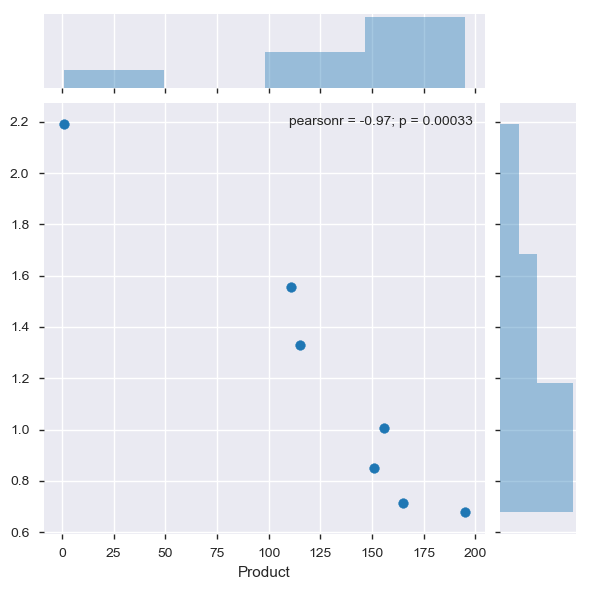

In [172]:
Data_grp = S_P_Product_df.groupby('Year')
x = Data_grp.Product.size()
y = Data_grp.indexValue.mean()
sns.jointplot(x =x,y =y.values);

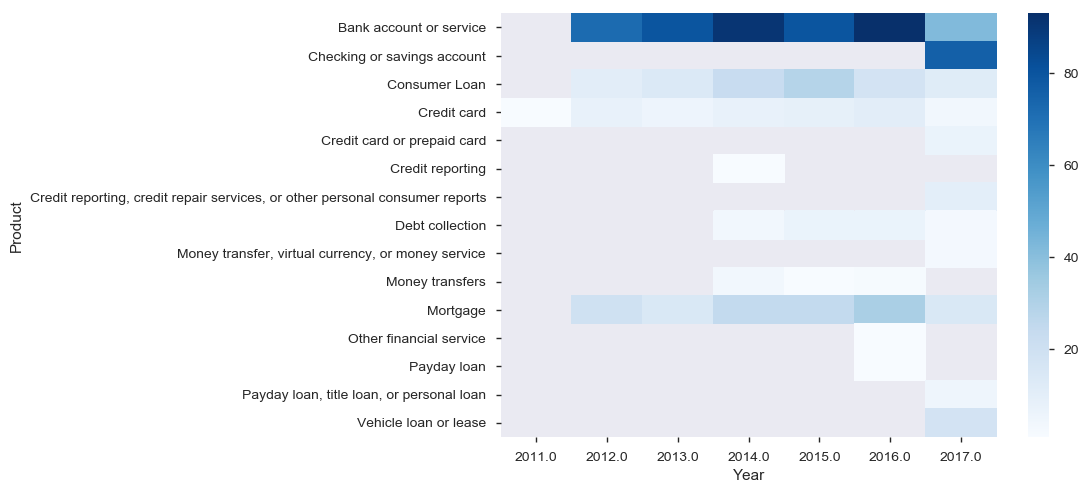

In [178]:
sns.heatmap(S_P_Product_df.pivot_table(index='Product',
                          columns ='Year' ,
                          aggfunc= len ,
                          values = 'indexValue' ), cmap= 'Blues');

In [180]:
#BOW_complains_Mortgage.ix[:,[4,15]].plot(figsize = (30,15))

In [67]:
#Merge S&P data only with Mortgage data
S_P_Mortgage_df = pd.merge(Mortgage_df, jason_df_MY,on='year_month',how ='outer')
S_P_Mortgage_df.head(3)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month,formattedEffectiveDate,indexValue
0,2015-11-19,Mortgage,Home equity loan or line of credit,"Loan servicing, payments, escrow account",NaN,"With great frustration, this is the third time...",Company chooses not to provide a public response,BANK OF THE WEST,CA,946XX,...,Web,11/19/2015,Closed with explanation,Yes,No,1664060.0,2015.0,2015-11,2015-11-30,0.8226
1,2015-11-02,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,My wife and I applied for a HARP loan with Ban...,Company chooses not to provide a public response,BANK OF THE WEST,CA,945XX,...,Web,11/02/2015,Closed with explanation,Yes,No,1635855.0,2015.0,2015-11,2015-11-30,0.8226
2,2016-12-02,Mortgage,Conventional adjustable mortgage (ARM),"Application, originator, mortgage broker",NaN,My husband and I applied for a jumbo mortgage ...,Company has responded to the consumer and the ...,BANK OF THE WEST,CO,800XX,...,Web,12/02/2016,Closed with explanation,Yes,Yes,2231527.0,2016.0,2016-12,2016-12-31,0.7086


In [68]:
S_P_Mortgage_df.Product.value_counts()

Mortgage    132
Name: Product, dtype: int64

In [69]:
S_P_Mortgage_df_plot = S_P_Mortgage_df[['Product','year_month','indexValue']]

In [70]:
#S_P_Mortgage_df_plot = [S_P_Mortgage_df_plot.year_month >= '2017-01']

In [71]:
S_P_Mortgage_df_plot.head()

,Product,year_month,indexValue
0,Mortgage,2015-11,0.8226
1,Mortgage,2015-11,0.8226
2,Mortgage,2016-12,0.7086
3,Mortgage,2016-12,0.7086
4,Mortgage,2016-12,0.7086


In [72]:
S_P_Mortgage_df_plot.set_index('year_month', inplace=True)

In [73]:
S_P_Mortgage_df_plot.head()

,Product,indexValue
year_month,,
2015-11,Mortgage,0.8226
2015-11,Mortgage,0.8226
2016-12,Mortgage,0.7086
2016-12,Mortgage,0.7086
2016-12,Mortgage,0.7086


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e478048>], dtype=object)

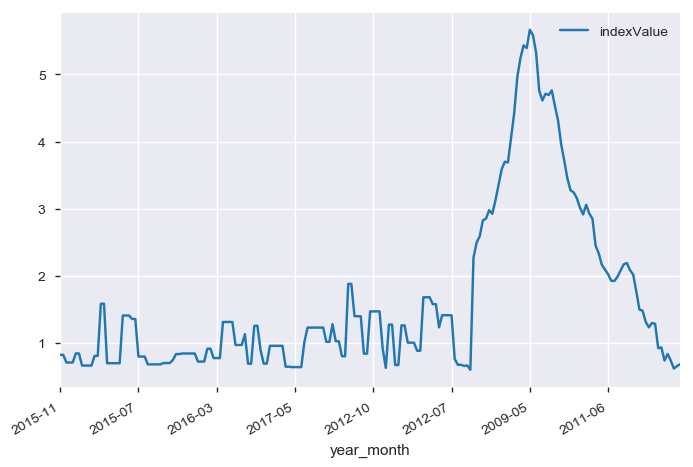

In [74]:
S_P_Mortgage_df_plot.plot(subplots=True)

In [75]:
S_P_Mortgage_df_plot['Product_num'] =S_P_Mortgage_df_plot.Product.map({'Mortgage':1})

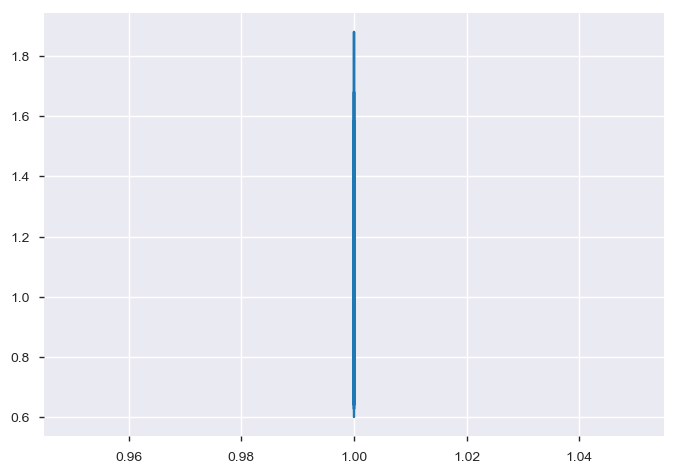

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(S_P_Mortgage_df_plot.Product_num, S_P_Mortgage_df_plot.indexValue)

In [77]:
S_P_Mortgage_df['Product_num'] =BOW_complains.Product.map({'Bank account or service':0, 'Mortgage':1,'Consumer Loan':2, 'Checking or savings account':3,'Credit card':4, 'Debt collection':5,'Vehicle loan or lease':6, 'Credit reporting, credit repair services, or other personal consumer reports':7, 'Credit card or prepaid card':8,'Money transfers':9,'Payday loan, title loan, or personal loan':10,'Money transfer, virtual currency, or money service':11,'Other financial service':12,'Credit reporting':13,'Payday loan':14})

In [78]:
S_P_Mortgage_df.dtypes


Date_received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer_complaint_narrative            object
Company_public_response                 object
Company                                 object
State                                   object
ZIP_code                                object
Tags                                    object
Consumer_consent_provided               object
Submitted_via                           object
Date_sent_to_company                    object
Company_response_to_consumer            object
Timely_response                         object
Consumer_disputed                       object
Complaint_ID                           float64
Year                                   float64
year_month                              object
formattedEffectiveDate          datetime64[ns]
indexValue   

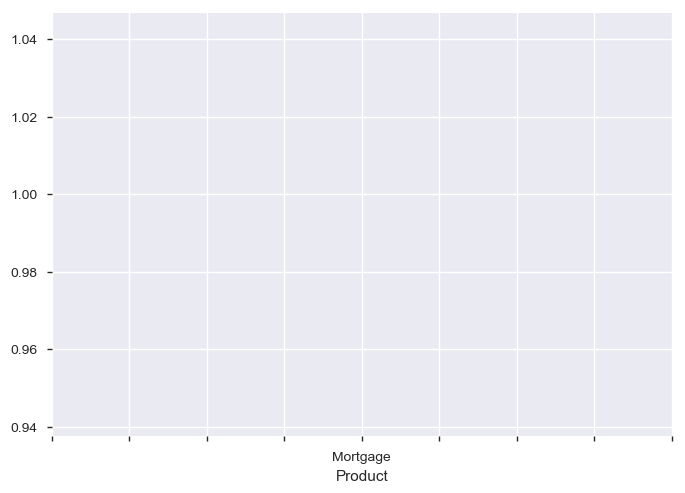

In [79]:
S_P_Mortgage_df.groupby(['Product']).indexValue.mean().plot()

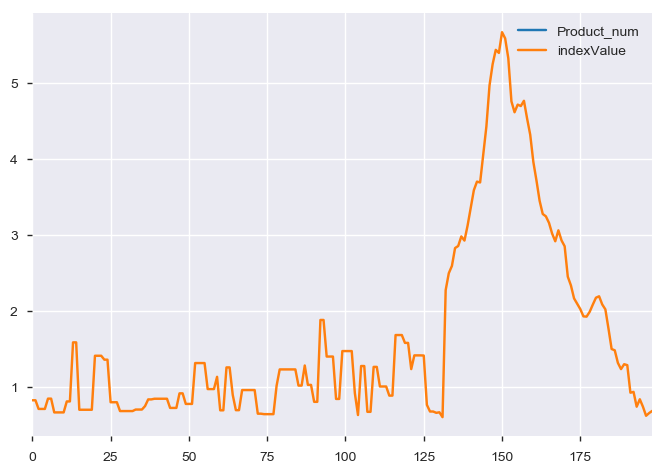

In [80]:
#S_P_Mortgage_df[['Product_num','indexValue']].plot(subplots=True or secondary_y=['Product_num'])
S_P_Mortgage_df[['Product_num','indexValue']].plot()

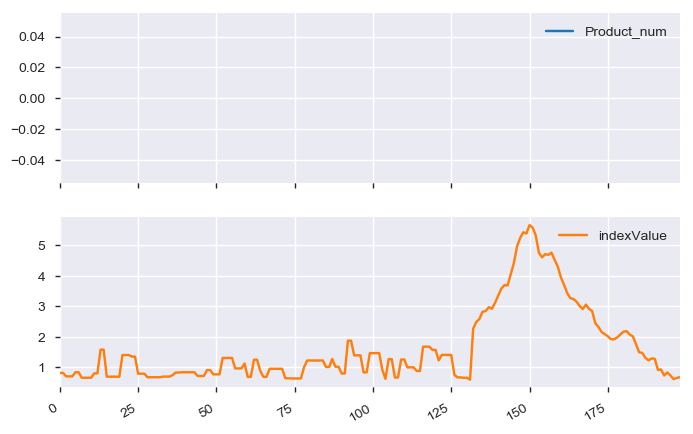

In [81]:
S_P_Mortgage_df[['Product_num','indexValue']].plot(subplots=True );

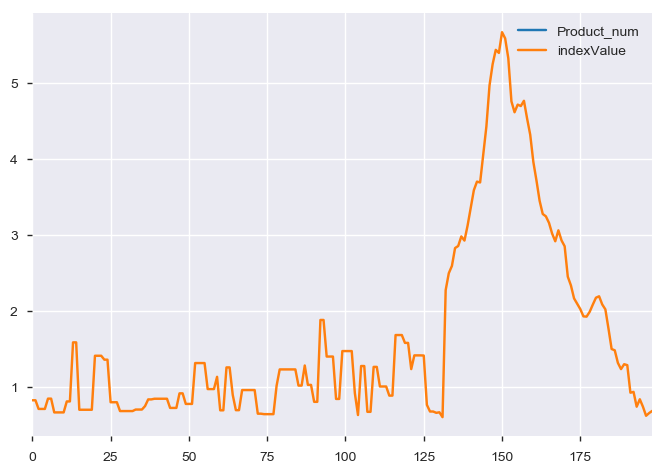

In [82]:
S_P_Mortgage_df[['Product_num','indexValue']].plot();

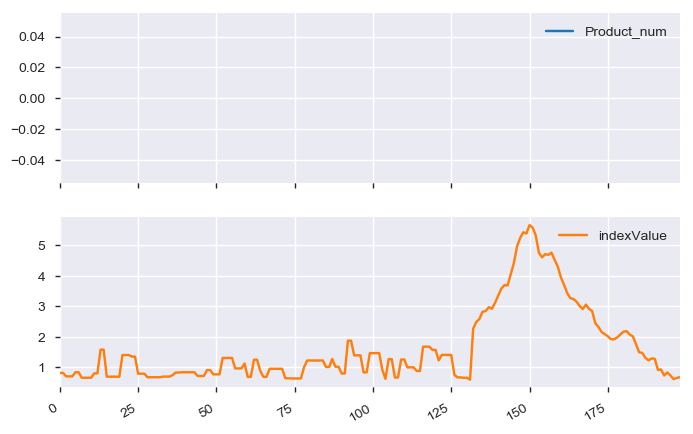

In [83]:
S_P_Mortgage_df[['Product_num','indexValue']].plot(subplots=True );

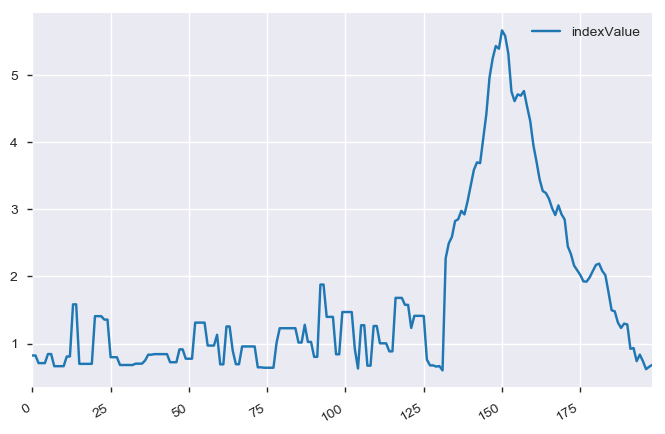

In [84]:
#S_P_Mortgage_df[['Product','indexValue']].plot(subplots=True or secondary_y=['Product'])
S_P_Mortgage_df[['Product','indexValue']].plot(subplots=True );

In [85]:
S_P_Mortgage_df.groupby(['Product', 'indexValue']).size().unstack().head(2)

indexValue,0.6003,0.6284,0.6399,0.6461,0.6573,0.6629,0.6645,0.6705,0.6748,0.6806,...,1.3567,1.3977,1.4081,1.4112,1.4131,1.4698,1.5774,1.5842,1.6807,1.8791
Product,,,,,,,,,,,,,,,,,,,,,
Mortgage,1.0,1.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,5.0,...,2.0,3.0,3.0,1.0,3.0,4.0,2.0,2.0,3.0,2.0


In [86]:
BOW_complains_Mortgage = pd.get_dummies(S_P_Mortgage_df, columns =['Product','Sub-product'])
BOW_complains_Mortgage.drop(['Date_received','Sub-issue','Submitted_via','Company','Date_sent_to_company','Company_response_to_consumer','Timely_response','Consumer_complaint_narrative','Issue','Consumer_disputed','Company_public_response','ZIP_code','Tags','Year','formattedEffectiveDate','Consumer_consent_provided'], axis =1,inplace =True)
BOW_complains_Mortgage.head(5)

,State,Complaint_ID,year_month,indexValue,Product_num,Product_Mortgage,Sub-product_Conventional adjustable mortgage (ARM),Sub-product_Conventional fixed mortgage,Sub-product_Conventional home mortgage,Sub-product_FHA mortgage,Sub-product_Home equity loan or line of credit,Sub-product_Home equity loan or line of credit (HELOC),Sub-product_Other mortgage,Sub-product_Other type of mortgage,Sub-product_VA mortgage
0,CA,1664060.0,2015-11,0.8226,NaN,1,0,0,0,0,1,0,0,0,0
1,CA,1635855.0,2015-11,0.8226,NaN,1,0,1,0,0,0,0,0,0,0
2,CO,2231527.0,2016-12,0.7086,NaN,1,1,0,0,0,0,0,0,0,0
3,CA,2233012.0,2016-12,0.7086,NaN,1,0,0,0,0,1,0,0,0,0
4,IA,2238199.0,2016-12,0.7086,NaN,1,0,1,0,0,0,0,0,0,0


### Based on the above predict what type of complaints we may receive in future:

### Analysis to show that the likelihood of filing complaints rose as an area’s income increased

### Complaints closed in favor of consumers have lower consumer dispute rates

### Generate a heatmap of all of the features in the dataset

## 4) Analysis of results:

In [87]:
BOW_complains.head(2)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month
2644,2014-09-13,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,NaN,NaN,Web,09/18/2014,Closed with explanation,Yes,Yes,1027710,2014,2014-09
3390,2013-05-08,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,BANK OF THE WEST,CA,94563,Older American,NaN,Web,05/08/2013,Closed with explanation,Yes,Yes,400780,2013,2013-05


In [88]:
BOW_complains.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID', 'Year',
       'year_month'],
      dtype='object')

In [89]:
BOW_complains.dtypes

Date_received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer_complaint_narrative            object
Company_public_response                 object
Company                                 object
State                                   object
ZIP_code                                object
Tags                                    object
Consumer_consent_provided               object
Submitted_via                           object
Date_sent_to_company                    object
Company_response_to_consumer            object
Timely_response                         object
Consumer_disputed                       object
Complaint_ID                             int64
Year                                     int64
year_month                              object
dtype: object

In [90]:
BOW_complains.Timely_response.value_counts()

Yes    837
No      57
Name: Timely_response, dtype: int64

In [91]:
BOW_complains.Timely_response.isnull().sum()

0

In [92]:
BOW_complains.groupby('Timely_response').mean()

,Complaint_ID,Year
Timely_response,,
No,1.902266e+06,2015.912281
Yes,1.373576e+06,2014.737157


In [93]:
BOW_complains['Timely_response_num'] =BOW_complains.Timely_response.map({'No':0, 'Yes':1})

In [94]:
BOW_complains['Product_num'] =BOW_complains.Product.map({'Bank account or service':0, 'Mortgage':1,'Consumer Loan':2, 'Checking or savings account':3,'Credit card':4, 'Debt collection':5,'Vehicle loan or lease':6, 'Credit reporting, credit repair services, or other personal consumer reports':7, 'Credit card or prepaid card':8,'Money transfers':9,'Payday loan, title loan, or personal loan':10,'Money transfer, virtual currency, or money service':11,'Other financial service':12,'Credit reporting':13,'Payday loan':14})

### Predict 'Timely_response'

In [95]:
feature_cols = ['Year']
X = BOW_complains[feature_cols]

In [96]:
y = BOW_complains.Timely_response_num

In [97]:
print(X.shape)
print(y.shape)

(894, 1)
(894,)


## 3) Model selection:

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [99]:
knn.predict(2018)

array([1])

### Predict for a specific product if there is a timely response

In [100]:
feature_cols = ['Product_num']
X = BOW_complains[feature_cols]
y = BOW_complains.Timely_response_num

In [101]:
print(X.shape)
print(y.shape)

(894, 1)
(894,)


In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [103]:
?????Other model

Object `` not found.


In [104]:
knn.predict(1)

array([1])

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [106]:

# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(894, 1)
(670, 1)
(224, 1)


In [107]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(894,)
(670,)
(224,)


In [108]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train =knn.predict(X_train)

In [109]:
from sklearn import metrics
print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

0.0716417910448
0.0401785714286


In [110]:
print(y_pred_test)
print(y_pred_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 

In [111]:
BOW_complains.Timely_response_num.value_counts()

1    837
0     57
Name: Timely_response_num, dtype: int64

### Preparing dataset that has the banks in the rows, the products in the columns, and the counts in the cells

### For all the Companies in CFPB database:

In [112]:
complains_data.groupby(['Company', 'Product']).size().unstack().head()

Product,Bank account or service,Checking or savings account,Consumer Loan,Credit card,Credit card or prepaid card,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Money transfers,Mortgage,Other financial service,Payday loan,"Payday loan, title loan, or personal loan",Prepaid card,Student loan,Vehicle loan or lease,Virtual currency
Company,,,,,,,,,,,,,,,,,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1 STOP MONEY CENTERS, LLC",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1ST 2ND MORTGAGE CO. OF NJ INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1ST ALLIANCE LENDING, LLC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1ST PREFERENCE MORTGAGE CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Only for Bank of the West:

In [113]:
BOW_complains.groupby(['Company', 'Product']).size().unstack()

Product,Bank account or service,Checking or savings account,Consumer Loan,Credit card,Credit card or prepaid card,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Money transfers,Mortgage,Other financial service,Payday loan,"Payday loan, title loan, or personal loan",Vehicle loan or lease
Company,,,,,,,,,,,,,,,
BANK OF THE WEST,458,76,107,47,7,1,10,21,3,7,132,1,1,5,18


In [114]:
BOW_complains.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID', 'Year',
       'year_month', 'Timely_response_num', 'Product_num'],
      dtype='object')

In [115]:
BOW_complains.groupby(['Product', 'Timely_response']).size().unstack()

Timely_response,No,Yes
Product,,
Bank account or service,28.0,430.0
Checking or savings account,4.0,72.0
Consumer Loan,6.0,101.0
Credit card,4.0,43.0
Credit card or prepaid card,1.0,6.0
Credit reporting,NaN,1.0
"Credit reporting, credit repair services, or other personal consumer reports",1.0,9.0
Debt collection,2.0,19.0
"Money transfer, virtual currency, or money service",NaN,3.0


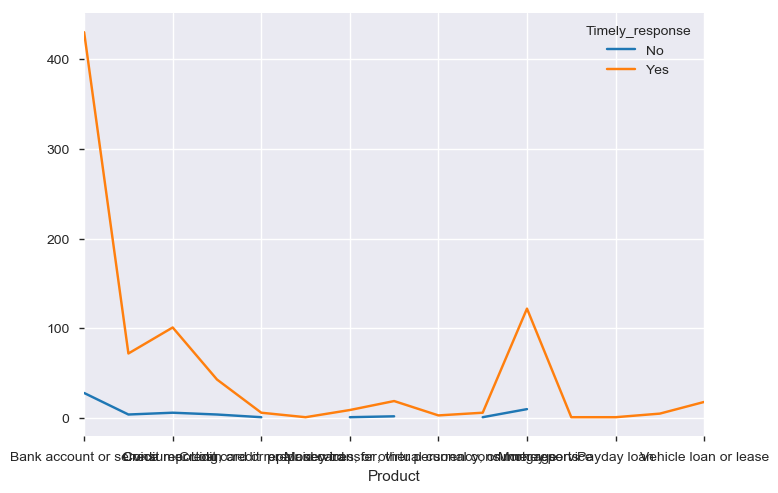

In [116]:
BOW_complains.groupby(['Product', 'Timely_response']).size().unstack().plot()

## Model selection using NLP for Text Data

## NLP

In [117]:
BOW_complains.Consumer_complaint_narrative.dropna().head(3)

4778    I live in XXXX and I purchased a car in XXXX X...
6703    With great frustration, this is the third time...
7738    My husband and I applied for a jumbo mortgage ...
Name: Consumer_complaint_narrative, dtype: object

In [118]:
#BOW_complains['Consumer_complaint_narrative'].value_counts() / len(BOW_complains)

In [119]:
BOW_complains['Timely_response_num'] =BOW_complains.Timely_response.map({'No':0, 'Yes':1})

In [120]:
BOW_complains.Consumer_disputed.value_counts()

No     615
Yes    147
Name: Consumer_disputed, dtype: int64

In [121]:
BOW_complains.dropna(subset =['Consumer_disputed'], how ='all').shape

(762, 22)

In [122]:
BOW_complains_Consumer_disputed_num =BOW_complains.dropna(subset =['Issue','Consumer_disputed'], how ='any')

In [123]:
BOW_complains_Consumer_disputed_num.head()

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month,Timely_response_num,Product_num
2644,2014-09-13,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,...,Web,09/18/2014,Closed with explanation,Yes,Yes,1027710,2014,2014-09,1,2
3390,2013-05-08,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,BANK OF THE WEST,CA,94563,...,Web,05/08/2013,Closed with explanation,Yes,Yes,400780,2013,2013-05,1,2
3673,2016-12-07,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,Company has responded to the consumer and the ...,BANK OF THE WEST,CO,80012,...,Referral,12/07/2016,Closed with explanation,Yes,Yes,2238408,2016,2016-12,1,2
4671,2015-01-21,Bank account or service,Checking account,Problems caused by my funds being low,NaN,NaN,NaN,BANK OF THE WEST,NE,68164,...,Web,01/21/2015,Closed with monetary relief,Yes,No,1202306,2015,2015-01,1,0
4778,2015-06-04,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,I live in XXXX and I purchased a car in XXXX X...,Company chooses not to provide a public response,BANK OF THE WEST,CO,805XX,...,Web,06/04/2015,Closed with explanation,Yes,No,1405349,2015,2015-06,1,0


In [124]:
BOW_complains_Consumer_disputed_num['Consumer_disputed_num'] = BOW_complains_Consumer_disputed_num.Consumer_disputed.map({'No':0, 'Yes':1})

In [125]:
BOW_complains.Company_response_to_consumer.value_counts()

Closed with explanation            663
Closed with monetary relief        149
Closed with non-monetary relief     40
Closed without relief               22
Closed with relief                  10
In progress                          6
Closed                               3
Untimely response                    1
Name: Company_response_to_consumer, dtype: int64

In [126]:
BOW_complains['Company_response_to_consumer_num'] =BOW_complains.Company_response_to_consumer.map({'Closed with explanation':0, 'Closed with monetary relief':1,'Closed with non-monetary relief':2, 'Closed without relief':3,'Closed with relief':4,'In progress':5, 'Closed':6,'Untimely response':7})

In [127]:
BOW_complains['Product_num'] =BOW_complains.Product.map({'Bank account or service':0, 'Mortgage':1,'Consumer Loan':2, 'Checking or savings account':3,'Credit card':4, 'Debt collection':5,'Vehicle loan or lease':6, 'Credit reporting, credit repair services, or other personal consumer reports':7, 'Credit card or prepaid card':8,'Money transfers':9,'Payday loan, title loan, or personal loan':10,'Money transfer, virtual currency, or money service':11,'Other financial service':12,'Credit reporting':13,'Payday loan':14})

In [128]:
BOW_complains.head(2)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Year,year_month,Timely_response_num,Product_num,Company_response_to_consumer_num
2644,2014-09-13,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BANK OF THE WEST,CO,80924,...,09/18/2014,Closed with explanation,Yes,Yes,1027710,2014,2014-09,1,2,0
3390,2013-05-08,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,BANK OF THE WEST,CA,94563,...,05/08/2013,Closed with explanation,Yes,Yes,400780,2013,2013-05,1,2,0


In [129]:
BOW_complains.Company_response_to_consumer.value_counts()

Closed with explanation            663
Closed with monetary relief        149
Closed with non-monetary relief     40
Closed without relief               22
Closed with relief                  10
In progress                          6
Closed                               3
Untimely response                    1
Name: Company_response_to_consumer, dtype: int64

In [130]:
BOW_complains.Timely_response.value_counts()

Yes    837
No      57
Name: Timely_response, dtype: int64

In [131]:
BOW_complains.Consumer_disputed.value_counts()

No     615
Yes    147
Name: Consumer_disputed, dtype: int64

In [132]:
BOW_complains.Issue.value_counts()

Account opening, closing, or management                         230
Deposits and withdrawals                                         90
Problems caused by my funds being low                            82
Managing the loan or lease                                       78
Loan servicing, payments, escrow account                         54
Managing an account                                              43
Using a debit or ATM card                                        28
Making/receiving payments, sending money                         28
Application, originator, mortgage broker                         28
Loan modification,collection,foreclosure                         26
Problems when you are unable to pay                              12
Problem caused by your funds being low                           12
Taking out the loan or lease                                     12
Opening an account                                               10
Cont'd attempts collect debt not owed           

## 1) Predicting the "Timely_response" based on "Issue" raised

In [133]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer

In [134]:
# Define X and y.
X = BOW_complains.Issue
y = BOW_complains.Timely_response_num
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [135]:
# We will use this function below for simplicity.
# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [136]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  147
Accuracy:  0.892857142857


In [137]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

Features:  118
Accuracy:  0.901785714286


In [138]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect) 

Features:  100
Accuracy:  0.897321428571


In [139]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')
# Fit transform complains data
dtm = vect.fit_transform(BOW_complains.Issue)
features = vect.get_feature_names()
dtm.shape
tokenize_test(vect) 

Features:  121
Accuracy:  0.946428571429


In [140]:
# Use default options for CountVectorizer.
v = TfidfVectorizer(stop_words='english')
# Create document-term matrices.
X_train_dtm = v.fit_transform(X_train)
X_test_dtm = v.transform(X_test)
# Use Naive Bayes to predict the Timely_response.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm) 
# Calculate accuracy.
print(metrics.accuracy_score(y_test, y_pred_class))

0.946428571429


In [141]:
BOW_complains.Issue.head(10)

2644                  Managing the loan or lease
3390         Problems when you are unable to pay
3673                  Managing the loan or lease
4428                          Opening an account
4671       Problems caused by my funds being low
4778     Account opening, closing, or management
5526       Problems caused by my funds being low
6595       Problems caused by my funds being low
6625                    Deposits and withdrawals
6703    Loan servicing, payments, escrow account
Name: Issue, dtype: object

In [142]:
nb.predict_proba(v.transform(pd.Series('Managing the loan or lease').to_frame('Issue')).toarray())

array([[ 0.1554564,  0.8445436]])

## 2) Predicting the "Consumer_disputed" based on "Issue" raised

In [143]:
# Define X and y.
X = BOW_complains_Consumer_disputed_num.Issue
y = BOW_complains_Consumer_disputed_num.Consumer_disputed_num
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [144]:
# We will use this function below for simplicity.
# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test1(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [145]:
vect = CountVectorizer()
tokenize_test1(vect)

Features:  117
Accuracy:  0.774869109948


In [146]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

Features:  88
Accuracy:  0.748691099476


In [147]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect) 

Features:  98
Accuracy:  0.774869109948


In [148]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')
# Fit transform complains data
dtm = vect.fit_transform(BOW_complains.Issue)
features = vect.get_feature_names()
dtm.shape
tokenize_test(vect)

Features:  98
Accuracy:  0.801047120419


In [149]:
# Use default options for CountVectorizer.
v = TfidfVectorizer(stop_words='english')
# Create document-term matrices.
X_train_dtm = v.fit_transform(X_train)
X_test_dtm = v.transform(X_test)
# Use Naive Bayes to predict the Timely_response.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm) 
# Calculate accuracy.
print(metrics.accuracy_score(y_test, y_pred_class))

0.801047120419


In [150]:
nb.predict_proba(v.transform(pd.Series('Loan servicing, payments, escrow account').to_frame('Issue')).toarray())

array([[ 0.77004995,  0.22995005]])

## 3) Predicting the "Company_response_to_consumer" based on "Issue" raised

In [151]:
# Define X and y.
X = BOW_complains.Issue
y = BOW_complains.Company_response_to_consumer_num
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [152]:
# We will use this function below for simplicity.
# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test2(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [153]:
vect = CountVectorizer()
tokenize_test2(vect)

Features:  147
Accuracy:  0.651785714286


In [154]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

Features:  118
Accuracy:  0.660714285714


In [155]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect) 

Features:  100
Accuracy:  0.674107142857


In [156]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')
# Fit transform complains data
dtm = vect.fit_transform(BOW_complains.Issue)
features = vect.get_feature_names()
dtm.shape
tokenize_test(vect)

Features:  121
Accuracy:  0.6875


In [157]:
# Use default options for CountVectorizer.
v = TfidfVectorizer(stop_words='english')
# Create document-term matrices.
X_train_dtm = v.fit_transform(X_train)
X_test_dtm = v.transform(X_test)
# Use Naive Bayes to predict the Timely_response.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm) 
# Calculate accuracy.
print(metrics.accuracy_score(y_test, y_pred_class))

0.6875


In [158]:
nb.predict_proba(v.transform(pd.Series('Account opening, closing, or management').to_frame('Issue')).toarray())

array([[ 0.4621951 ,  0.33272343,  0.09011499,  0.05559401,  0.02096776,
         0.02517356,  0.00875943,  0.00447172]])

## 4) Predicting the "type of Product" based on "Issue" raised

In [159]:
# Define X and y.
X = BOW_complains.Issue
y = BOW_complains.Product_num
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [160]:
# We will use this function below for simplicity.
# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test3(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))   

In [161]:
vect = CountVectorizer()
tokenize_test3(vect)

Features:  147
Accuracy:  0.946428571429


In [162]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

Features:  118
Accuracy:  0.941964285714


In [163]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect) 

Features:  100
Accuracy:  0.919642857143


In [164]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')
# Fit transform complains data
dtm = vect.fit_transform(BOW_complains.Issue)
features = vect.get_feature_names()
dtm.shape
tokenize_test(vect) 

Features:  121
Accuracy:  0.910714285714


In [165]:
# Use default options for CountVectorizer.
v = CountVectorizer()
# Create document-term matrices.
X_train_dtm = v.fit_transform(X_train)
X_test_dtm = v.transform(X_test)
# Use Naive Bayes to predict the Timely_response.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm) 
# Calculate accuracy.
print(metrics.accuracy_score(y_test, y_pred_class))

0.946428571429


In [166]:
nb.predict_proba(v.transform(pd.Series('Problems  with when you are unable to pay').to_frame('Issue')).toarray())

array([[ 0.13625245,  0.12215269,  0.10348484,  0.11216131,  0.32362532,
         0.04291851,  0.03599142,  0.03053817,  0.02470504,  0.02898539,
         0.01602003,  0.01348925,  0.00485375,  0.00482182]])

In [167]:
from textblob import TextBlob

### How to convet Random text to numpy ndarray(To predecit random text)

In [168]:
#Create a strin object using pandas series
pd.Series('Problems  with when you are unable to pay')

0    Problems  with when you are unable to pay
dtype: object

In [169]:
#Create a data frame using to_frame function
pd.Series('Problems  with when you are unable to pay').to_frame('Issue')

,Issue
0,Problems with when you are unable to pay


In [170]:
# Convert into numpy ndarray using transform function
v.transform(pd.Series('Problems  with when you are unable to pay').to_frame('Issue')).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [171]:
type(v.transform(pd.Series('Problems  with when you are unable to pay').to_frame('Issue')).toarray())

numpy.ndarray

### Predict whether a complaint will be disputed by a customer or not?

### How many complaints of a certain type will the company receive next year? 

### How are companies or products similar/different in terms of types of complaints received?

### What topics do users of a certain product complain most about?

### Predit what type of consumer complaints may raise due to market changes

# Findings: